In [1]:
import json
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib
import itertools

In [2]:
#dataset = "FINAL_BASE_DATASET_WITH_BETS_WITH_SEASON"
#dataset = "FINAL_BASE_DATASET_TEAM_RATINGS_WITH_NO_ZEROS_ADDED_NO_BETS_AGE_BMI_ZEROS_NOT_REMOVED_WITH_SEASON"
dataset = "FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON"
#dataset = "FINAL_BASE_DATASET_WITH_SEASON"

#local
data = pd.read_csv("./../Preprocessing/Data_Structures/{}.csv".format(dataset), index_col=0)
#aws instance
#data = pd.read_csv("{}.csv".format(dataset), index_col=0)

data_train = data[(data["season"] == "2014/2015")]# |(data["season"] == "2013/2014")|(data["season"] == "2012/2013")|(data["season"] == "2011/2012")|(data["season"] == "2010/2011")]
#data_train = data[data["season"] != "2015/2016"]
data_test = data[data["season"] == "2015/2016"]

data.head()
y_train = data_train.Label
X_train = data_train.drop("Label", axis = 1)
X_train = X_train.drop("season", axis = 1)
y_test = data_test.Label
X_test = data_test.drop("Label", axis = 1)
X_test = X_test.drop("season", axis = 1)

In [3]:
y_test.value_counts()

2    979
0    671
1    556
Name: Label, dtype: int64

In [4]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [5]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_error',
    'num_class':3,
    'learning_rate':0.005,
    'num_leaves':7,
    'min_data_in_leaf':5,
    'n_estimators':9,
    'max_depth':6,
}

In [6]:
classifier = lgb.LGBMClassifier(**params).fit(X_train,y_train)
y_pred = classifier.predict(X_test)
        
print confusion_matrix(y_pred=y_pred, y_true=y_test)
print f1_score(y_test, y_pred, average='weighted')
print accuracy_score(y_true=y_test, y_pred=y_pred)

[[317  31 323]
 [163  47 346]
 [160  35 784]]
0.468638143314
0.520398912058


/Users/steeve/anaconda2/lib/python2.7/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/Users/steeve/anaconda2/lib/python2.7/site-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


### Results
###### All Training Data
   'learning_rate':0.005,
    'num_leaves':22,
    'min_data_in_leaf':34,
    'n_estimators':21,
    'max_depth':8,
    51.22%
###### 2014/15 Training Data
'learning_rate':0.005,
    'num_leaves':7,
    'min_data_in_leaf':5,
    'n_estimators':9,
    'max_depth':6,
    52.03%
    
###### 2013-15 Training Data
'learning_rate':0.005,
    'num_leaves':7,
    'min_data_in_leaf':34,
    'n_estimators':7,
    'max_depth':8,
    50.86%
    
###### 2012-15 Training Data
'learning_rate':0.005,
    'num_leaves':8,
    'min_data_in_leaf':27,
    'n_estimators':8,
    'max_depth':6,
    50.27%
    
###### 2011-15 Training Data
'learning_rate':0.005,
    'num_leaves':8,
    'min_data_in_leaf':111,
    'n_estimators':4,
    'max_depth':7,
    51.41%
    
###### 2010-15 Training Data
'learning_rate':0.005,
    'num_leaves':5,
    'min_data_in_leaf':10,
    'n_estimators':7,
    'max_depth':4,
    51.04% 
    
   ###### 2009-15 Training Data
'learning_rate':0.005,
    'num_leaves':7,
    'min_data_in_leaf':83,
    'n_estimators':2,
    'max_depth':5,
    50.73% 

In [6]:
gridParams = {
    #'learning_rate':np.linspace(0.001,0.01,11)
    #'n_estimators': range(1,10,1),
    #'num_leaves': range(2,10,1),
    #'min_data_in_leaf':range(1,150),
    'max_depth':range(1,10),
    }

# Create classifier to use. Note that parameters have to be input manually
# not as a dict!
mdl = lgb.LGBMClassifier(**params)

# To view the default model params:
#mdl.get_params().keys()

# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=5, n_jobs=1, scoring='accuracy')
# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
grid.grid_scores_, grid.best_score_, grid.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.1s
[CV] max_depth=1 .....................................................


/usr/local/lib/python2.7/dist-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/usr/local/lib/python2.7/dist-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................................... max_depth=1, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    7.3s finished
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.52703, std: 0.01886, params: {'max_depth': 1},
  mean: 0.53783, std: 0.01796, params: {'max_depth': 2},
  mean: 0.54270, std: 0.01750, params: {'max_depth': 3},
  mean: 0.54308, std: 0.01794, params: {'max_depth': 4},
  mean: 0.54308, std: 0.01794, params: {'max_depth': 5},
  mean: 0.54308, std: 0.01794, params: {'max_depth': 6},
  mean: 0.54308, std: 0.01794, params: {'max_depth': 7},
  mean: 0.54308, std: 0.01794, params: {'max_depth': 8},
  mean: 0.54308, std: 0.01794, params: {'max_depth': 9}],
 0.54308368360718384,
 {'max_depth': 4})

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


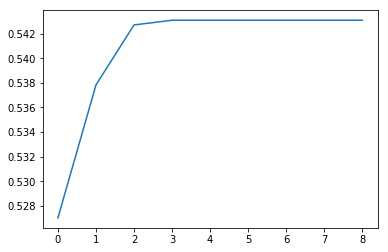

In [7]:
scores = [x[1] for x in grid.grid_scores_]
plt.plot(range(0,len(scores)), scores)
plt.show()

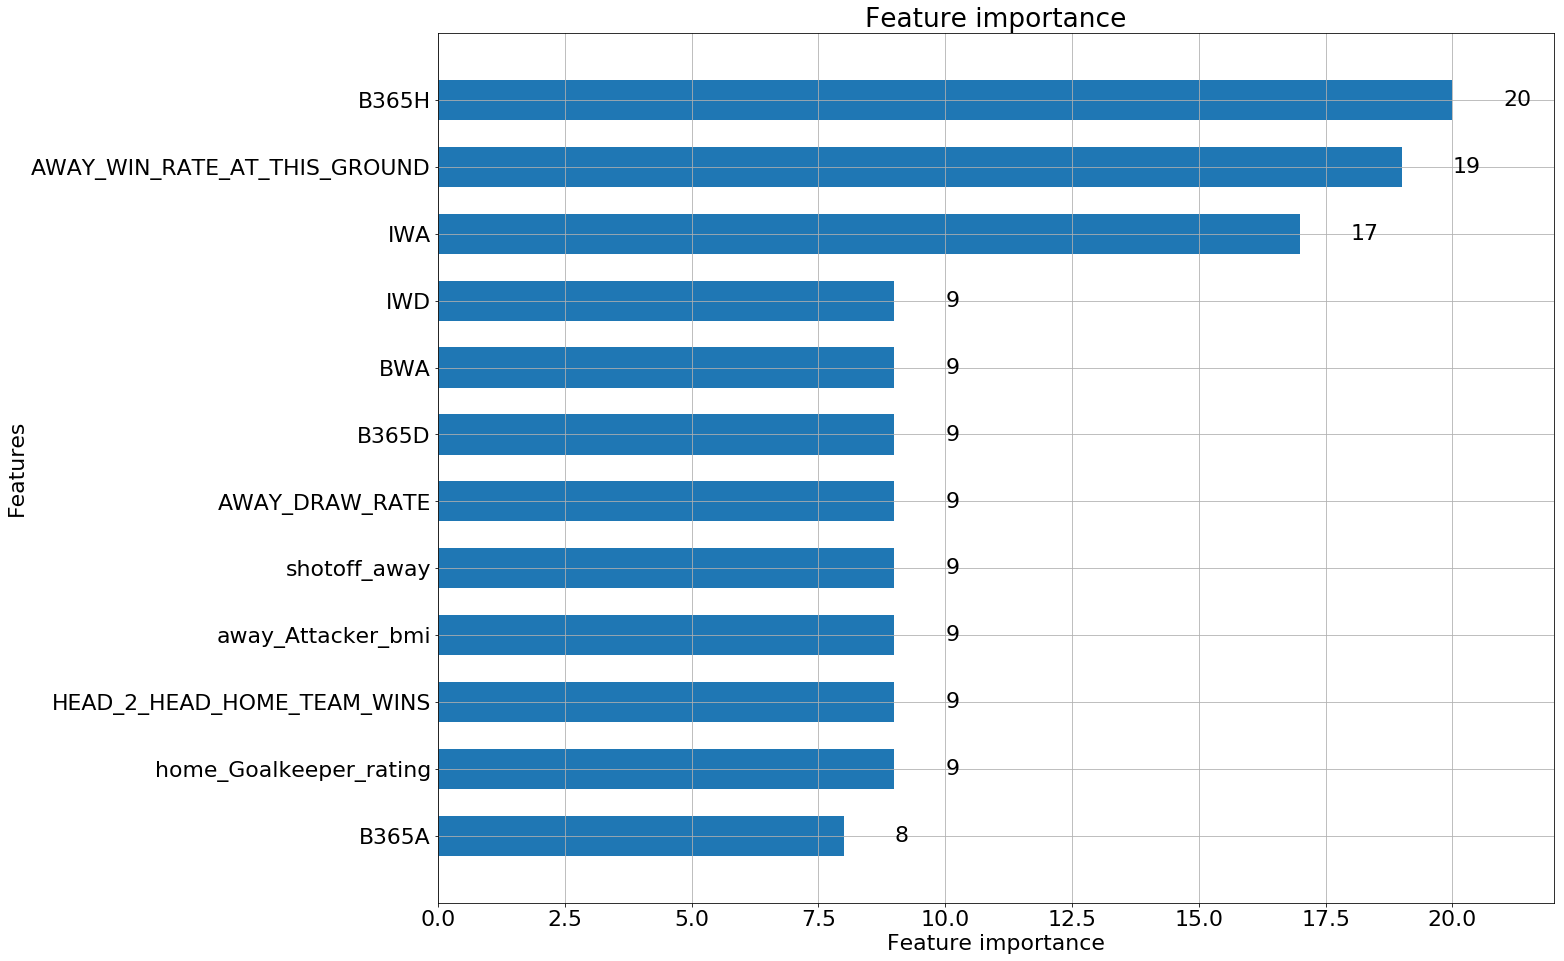

In [20]:
fig, ax = plt.subplots(1,1,figsize=(20,16))
#matplotlib.rcParams.update({'font.size': 22})
lgb.plot_importance(classifier, max_num_features=12, height=0.6, ax=ax)
plt.show()

Normalized confusion matrix
[[ 0.4953125   0.27433628  0.22229869]
 [ 0.2546875   0.4159292   0.23812801]
 [ 0.25        0.30973451  0.5395733 ]]


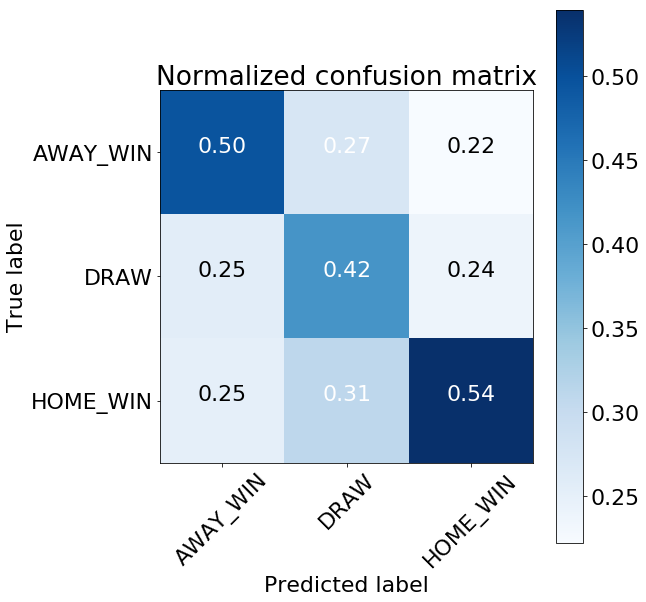

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.astype('float') / cm.sum(axis=0)
        print("Normalized confusion matrix")
        title = 'Normalized confusion matrix'
    else:
        print('Confusion matrix, without normalization')

    print(cm)
2    fig, ax = plt.subplots(1,1,figsize=(9,9))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
le = LabelEncoder()

LABELS = ['HOME_WIN', 'AWAY_WIN', 'DRAW']
le.fit(LABELS)
CLASSES_NAME = le.inverse_transform([0,1,2])
plot_confusion_matrix(confusion_matrix(y_pred=y_pred, y_true=y_test), CLASSES_NAME, True)
plt.show()